[[ 5.03985830e+00  4.87835454e+00  4.92349936e+00  4.60153748e+00
   4.36823137e+00  3.93246280e+00  3.65710372e+00  3.16229602e+00
   2.55613454e+00  2.11306917e+00  1.48884100e+00  7.66186203e-01
   7.22387105e-02 -3.93130197e-01 -1.14762949e+00 -1.65298151e+00
  -2.33335175e+00 -2.77118140e+00 -3.28853284e+00 -3.75603481e+00
  -4.27792828e+00 -4.54968902e+00 -4.83692477e+00 -4.99625913e+00
  -4.90719087e+00 -5.04445161e+00 -4.96567561e+00 -4.77350437e+00
  -4.49150923e+00 -4.23007928e+00 -3.72638458e+00 -3.39486044e+00
  -2.87206685e+00 -2.37075923e+00 -1.81854940e+00 -1.09821543e+00
  -4.28242431e-01  1.89189793e-01  7.33741253e-01  1.37535272e+00
   1.93490083e+00  2.49646578e+00  3.07662357e+00  3.66090230e+00
   3.92618433e+00  4.33137156e+00  4.65636018e+00  4.90512433e+00
   4.92841320e+00  4.99213103e+00]
 [ 9.45590992e-05  7.04327271e-01  1.27281046e+00  1.87102668e+00
   2.45634214e+00  3.01737774e+00  3.54965498e+00  3.90331164e+00
   4.36874278e+00  4.53759271e+00  4.7161

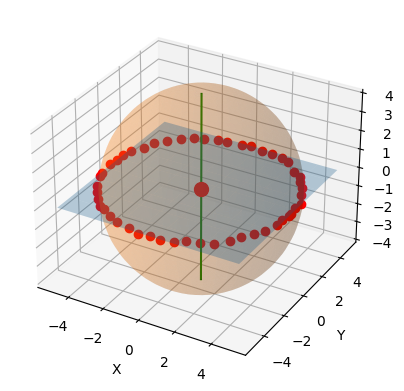

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# wygenerowanie siatki punktów na okręgu w 3D
n = 50
r = 5
theta = np.linspace(0, 2*np.pi, n)
x = r*np.cos(theta)
y = r*np.sin(theta)
z = np.zeros(n)
for i in range(n):
    x[i] += np.random.uniform(-0.1,0.1)
    y[i] += np.random.uniform(-0.1,0.1)
    z[i] += np.random.uniform(-0.1,0.1)

# utworzenie macierzy z punktami
points = np.array([x, y, z])
print(points)

# aproksymacja płaszczyzną
A = np.vstack([points[0], points[1], np.ones(n)]).T
plane_params = np.linalg.lstsq(A, points[2], rcond=None)[0]

# wyświetlenie wyników
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, 'o', color='red')

# wyznaczenie płaszczyzny
xx, yy = np.meshgrid(np.linspace(-r, r, 10), np.linspace(-r, r, 10))
zz = plane_params[0]*xx + plane_params[1]*yy + plane_params[2]
ax.plot_surface(xx, yy, zz, alpha=0.3)

# wyznaczenie centrum punktów i nanieś je na płaszczyznę
center = np.mean(points, axis=1)
z_center = plane_params[0]*center[0] + plane_params[1]*center[1] + plane_params[2]
ax.scatter(center[0], center[1], z_center, c='red', s=100)

# wyznaczenie średniej odległości od centrum
distances = np.linalg.norm(points.T - center, axis=1)
mean_distance = np.mean(distances)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_zlim([-4, 4])
theta = np.linspace(0, 2*np.pi, 50)
x = mean_distance*np.cos(theta) + center[0]
y = mean_distance*np.sin(theta) + center[1]
z = np.zeros(50) + z_center

u = np.linspace(0, 2 * np.pi, 50)
v = np.linspace(0, np.pi, 50)
x = center[0] + mean_distance * np.outer(np.cos(u), np.sin(v))
y = center[1] + mean_distance * np.outer(np.sin(u), np.sin(v))
z = z_center + mean_distance * np.outer(np.ones(np.size(u)), np.cos(v))

# wyznaczenie wektora normalnego do płaszczyzny
normal_vector = np.array([plane_params[0], plane_params[1], -1])

# wyznaczenie punktów na osi symetrii
axis_start = center - mean_distance * normal_vector / np.linalg.norm(normal_vector)
axis_end = center + mean_distance * normal_vector / np.linalg.norm(normal_vector)

# rysowanie osi symetrii
ax.plot([axis_start[0], axis_end[0]], [axis_start[1], axis_end[1]], [axis_start[2], axis_end[2]], color='green')

# rysowanie sfery
ax.plot_surface(x, y, z, alpha=0.2)

plt.show()